# Compte-Rendu : LU2PY222 - Modélisation Numérique en Physique

## Partie 1

Afin de répondre au sujet, créons un tableau regroupant les valeurs de temps entre $t_0$ et $t_{50}$ :

In [16]:
import numpy as np

# Nombre de valeurs
N = 51

# Création du tableau temps
temps = np.zeros(N)

# Assigner les valeurs pour chaque temps
for i in range(N):
    temps[i] = i + 0.5*np.sqrt(i)

print(temps)

[ 0.          1.5         2.70710678  3.8660254   5.          6.11803399
  7.22474487  8.32287566  9.41421356 10.5        11.58113883 12.6583124
 13.73205081 14.80277564 15.87082869 16.93649167 18.         19.06155281
 20.12132034 21.17944947 22.23606798 23.29128785 24.34520788 25.39791576
 26.44948974 27.5        28.54950976 29.59807621 30.64575131 31.6925824
 32.73861279 33.78388218 34.82842712 35.87228132 36.91547595 37.95803989
 39.         40.04138127 41.082207   42.122499   43.16227766 44.20156212
 45.24037035 46.27871926 47.31662479 48.35410197 49.39116499 50.4278273
 51.46410162 52.5        53.53553391]


Vérifions, à l'aide d'opérateurs booléens, que ces valeurs de temps sont bien celles attendues.

In [2]:
print(temps[1] == 1.5, temps[4] == 5.0, temps[9] == 10.5, temps[16] == 18.0, temps[25] == 27.5)

True True True True True


Nous constatons que chaque test renvoie le bool "True", ce qui confirme l'addéquation entre les valeurs théoriques et celles calculées ici.

Calculons ensuite les vitesses en $x$ et en $y$, que l'on nommera $v_x$ et $v_y$ respectivement, du proton dans le cyclotron entre $t_2 -1$ et $t_2$, puis entre $t_4 -1$ et $t_4$.

In [8]:
# Bornes et taille de l'échantillon
nombre = 100 
a_2 = temps[2] - 1
b_2 = temps[2]
a_4 = temps[4] - 1
b_4 = temps[4]

# Echantillonnage, afin de simuler un temps continu
temps_ech_2 = np.linspace(a_2, b_2, nombre)
temps_ech_4 = np.linspace(a_4, b_4, nombre)

Dans les deux cas de figure, il s'agit de la situation pour laquelle $t$ varie de $t_{n+1} - 1$ à $t_{n+1}$, c'est-à-dire : 

$$
v_x(t) = \epsilon_n \sqrt{n+1} \sin \left( \pi (t-t_{n+1}) \right) \qquad v_y(t) = -\epsilon_n \sqrt{n+1} \cos \left( \pi (t-t_{n+1}) \right)
$$

Pour $t_2$ et $t_4$, $n$ est nécessairement impair, donc $\epsilon = -1$. Ainsi :

In [5]:
# Calcul des vitesses selon x et y entre t2-1 et t2
vx_2 = - np.sqrt(2)*np.sin(np.pi*(temps_ech_2 - temps[2]))
vy_2 = np.sqrt(2)*np.cos(np.pi*(temps_ech_2 - temps[2]))

# Calcul des vitesses selon x et y entre t4-1 et t4
vx_4 = - 2*np.sin(np.pi*(temps_ech_4 - temps[4]))
vy_4 = 2*np.cos(np.pi*(temps_ech_4 - temps[4]))

Représentons graphiquement les vitesses obtenus dans les deux cas :

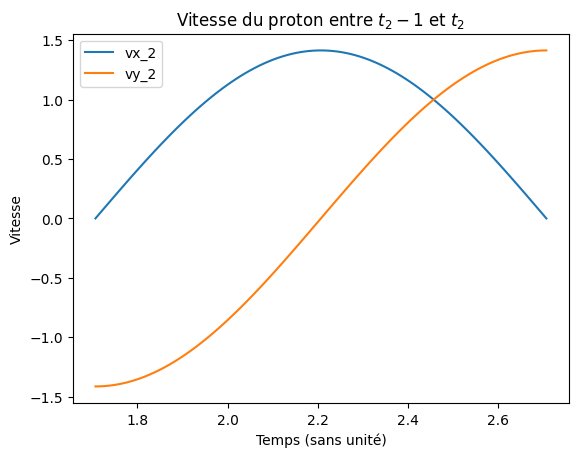

In [6]:
import matplotlib.pyplot as plt

plt.plot(temps_ech_2, vx_2, label = 'vx_2')
plt.plot(temps_ech_2, vy_2, label = 'vy_2')
plt.xlabel('Temps (sans unité)')
plt.ylabel('Vitesse')
plt.title('Vitesse du proton entre $t_2 - 1$ et $t_2$')
plt.legend()
plt.show()

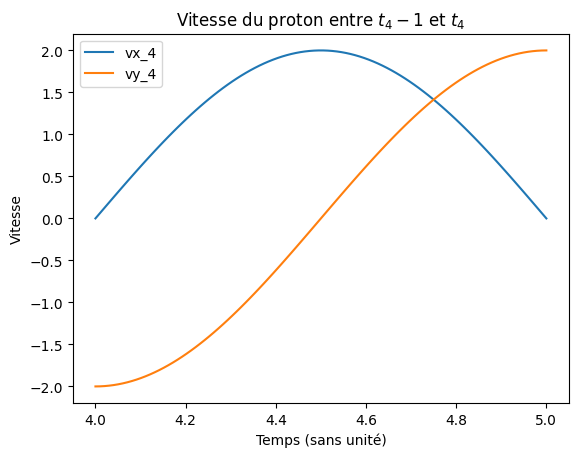

In [7]:
plt.plot(temps_ech_4, vx_4, label = 'vx_4')
plt.plot(temps_ech_4, vy_4, label = 'vy_4')
plt.xlabel('Temps (sans unité)')
plt.ylabel('Vitesse')
plt.title('Vitesse du proton entre $t_4 - 1$ et $t_4$')
plt.legend()
plt.show()

Nous constatons que, dans les deux cas, le proton suit des mouvements du même type (parabolique), mais d'amplitudes différentes : les vitesses $v_x$ et $v_y$ sont plus élevées en norme pour des temps plus élevés, ce qui suggère une accélération à un moment donné. Vérifions-le quantitativement en trouvant les vitesses maximales en $x$ et $y$ pour les deux intervalles étudiés ci-dessus :

In [11]:
print("Pour vx_2 :")
for i in range(vx_2.size):
    # Si la vitesse est égale au maximum de vitesse, alors la boucle conditionnelle s'arrête et renvoie les valeurs demandées
    if vx_2[i] == np.max(vx_2):
        print("Indice :", i)
        print("Vitesse :", vx_2[i])
        print("Temps associé :", temps_ech_2[i], '\n')
        break

print("Pour vy_2 :")
for i in range(vy_2.size):
    if vy_2[i] == np.max(vy_2):
        print("Indice :", i)
        print("Vitesse :", vy_2[i])
        print("Temps associé :", temps_ech_2[i], '\n')
        break

print("Pour vx_4 :")
for i in range(vx_4.size):
    if vx_4[i] == np.max(vx_4):
        print("Indice :", i)
        print("Vitesse :", vx_4[i])
        print("Temps associé :", temps_ech_4[i], '\n')
        break
        
print("Pour vy_4 :")
for i in range(vy_4.size):
    if vy_4[i] == np.max(vy_4):
        print("Indice :", i)
        print("Vitesse :", vy_4[i])
        print("Temps associé :", temps_ech_4[i], '\n')
        break

Pour vx_2 :
Indice : 49
Vitesse : 1.414035552022362
Temps associé : 2.2020562761360423 

Pour vy_2 :
Indice : 99
Vitesse : 1.4142135623730951
Temps associé : 2.7071067811865475 

Pour vx_4 :
Indice : 49
Vitesse : 1.9997482553477504
Temps associé : 4.494949494949495 

Pour vy_4 :
Indice : 99
Vitesse : 2.0
Temps associé : 5.0 



Nous observons en effet que $v_{x, 2, max}<v_{x, 4, max}$ et $v_{y, 2, max}<v_{y, 4, max}$. Cela démontre bel et bien que la vitesse a augmenté entre les deux intervalles de temps étudiés, et donc qu'un accélération a eu lieu.

## Partie 2

Afin d'étudier l'ampleur et les causes de cette accélération, nous devons étudier les vitesses sur un plus grand intervalle de temps : entre $t_0 = 0$ et $t_6$. Débutons d'abord par définir nos constantes et échantillonner nos valeurs de temps :

In [12]:
# Temps caractéristique choisi
tau = 0.5

# Echantillonnage
nombre = 600 
a = 0
b = temps[6]
temps_ech = np.linspace(a, b, nombre)

# Constantes
t0 = temps[0]
t1 = temps[1]
t2 = temps[2]
t3 = temps[3]
t4 = temps[4]
t5 = temps[5]
t6 = temps[6]

# Initialisation des matrices de vitesse
vx = np.zeros(nombre)
vy = np.zeros(nombre)

La différence par rapport au calcul de vitesse effectué ci-dessus est que cette  fois-ci, nous ne sommes pas que dans le régime pour lequel $t$ varie entre $t_{n+1} - 1$ et $t_{n+1}$ : il faut aussi prendre en compte la variation de $t$ entre $t_n$ et $t_{n+1}-1$, pour laquelle

$$
v_x(t) = 0  \qquad  v_y(t) = \epsilon_n \left( \sqrt{n} + (t-t_n)/\tau \right)
$$

Comme l'intervalle de temps étudié est plutôt court, nous pouvons nous permettre d'utiliser des boucles conditionnelles `for` et `if` pour disjoindre les deux régimes. Ce ne sera cependant pas le cas par la suite.

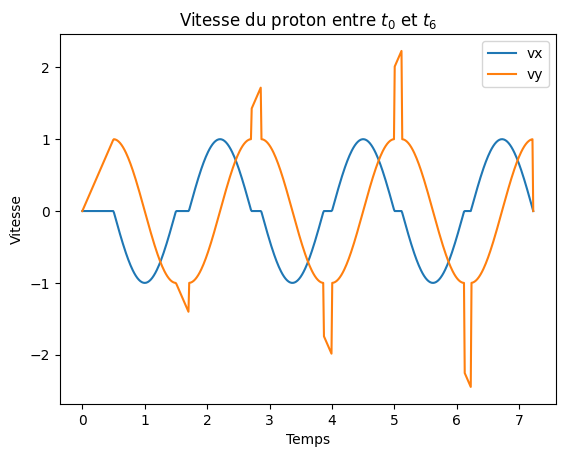

In [14]:
# Calcul des vitesses pour tous les temps de l'échantillon, en faisant la disjonction des régimes.
for i in range(temps_ech.size):
    if temps_ech[i] < (t1-1):
        vx[i] = 0
        vy[i] = temps_ech[i]/ tau
    if (t1-1) < temps_ech[i] < (t1):
        vx[i] = np.sin(np.pi*(temps_ech[i] - t1))
        vy[i] = -np.cos(np.pi*(temps_ech[i] - t1))
    
    if t1 < temps_ech[i] < (t2-1):
        vx[i] = 0
        vy[i] = -(1+(temps_ech[i] - t1)/tau)
    if (t2-1) < temps_ech[i] < (t2):
        vx[i] = -np.sin(np.pi*(temps_ech[i] - t2))
        vy[i] = np.cos(np.pi*(temps_ech[i] - t2))
        
    if t2 < temps_ech[i] < (t3-1):
        vx[i] = 0
        vy[i] = (np.sqrt(2)+(temps_ech[i] - t2)/tau)
    if (t3-1) < temps_ech[i] < (t3):
        vx[i] = np.sin(np.pi*(temps_ech[i] - t3))
        vy[i] = -np.cos(np.pi*(temps_ech[i] - t3))
        
    if t3 < temps_ech[i] < (t4-1):
        vx[i] = 0
        vy[i] = -(np.sqrt(3)+(temps_ech[i] - t3)/tau)
    if (t4-1) < temps_ech[i] < (t4):
        vx[i] = -np.sin(np.pi*(temps_ech[i] - t4))
        vy[i] = np.cos(np.pi*(temps_ech[i] - t4))
        
    if t4 < temps_ech[i] < (t5-1):
        vx[i] = 0
        vy[i] = (np.sqrt(4)+(temps_ech[i] - t4)/tau)
    if (t5-1) < temps_ech[i] < (t5):
        vx[i] = np.sin(np.pi*(temps_ech[i] - t5))
        vy[i] = -np.cos(np.pi*(temps_ech[i] - t5))
        
    if t5 < temps_ech[i] < (t6-1):
        vx[i] = 0
        vy[i] = -(np.sqrt(5)+(temps_ech[i] - t5)/tau)
    if (t6-1) < temps_ech[i] < (t6):
        vx[i] = -np.sin(np.pi*(temps_ech[i] - t6))
        vy[i] = np.cos(np.pi*(temps_ech[i] - t6))


# Représentaiton graphique des résultats
plt.plot(temps_ech, vx, label = 'vx')
plt.plot(temps_ech, vy, label = 'vy')
plt.xlabel('Temps')
plt.ylabel('Vitesse')
plt.title('Vitesse du proton entre $t_0$ et $t_6$')
plt.legend()
plt.show()

Nous observons que les vitesses varient sinusoïdalement lorsque le proton se situe dans les dee inérieurs et supérieurs. Cependant, lorsqu'il sort des dees et qu'il se retrouve dans l'interstice les séparant (évident car lorsque c'est le cas, $v_x = 0$), nous pouvons constater un saut de vitesse en $v_y$, semblant augmenter linéairement au fur et à mesure du temps. Il s'agit-là de l'accélération que nous recherchions. Il est plus intéressant de se pencher sur l'accélération à partir des **modules** de vitesse $v = \sqrt{v_x^2 + v_y^2}$ :

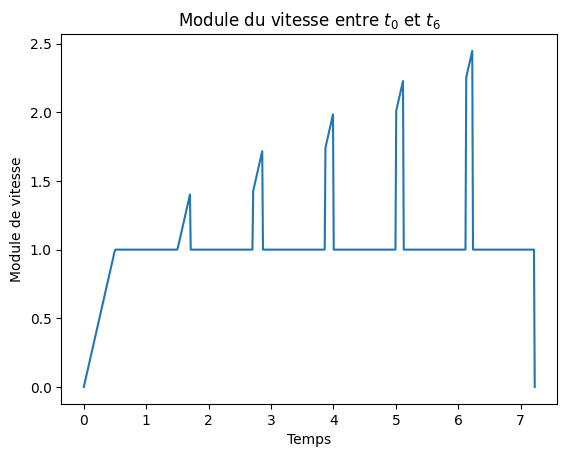

In [15]:
# Définition du module de vitesse
module = np.sqrt(vx**2 + vy**2)

# Représentaiton graphique du module de vitesse en fonction du temps
plt.plot(temps_ech, module)
plt.xlabel('Temps')
plt.ylabel('Module de vitesse')
plt.title('Module du vitesse entre $t_0$ et $t_6$')
plt.show()

L'hypothèse est donc la bonne : le module de vitesse semble augmenter linéairement au fur et à mesure du temps, et donc au fur et à mesure que le proton est soumis au champ électrique entre les dees. Il est donc évident que le cyclotron est un accélérateur de particules. Vérifions que le temps passé par le proton entre les dees pour $t$ variant jusqu'à $t_{50}$ est de plus en plus faible. Cette fois-ci, nous utiliserons une fonction :

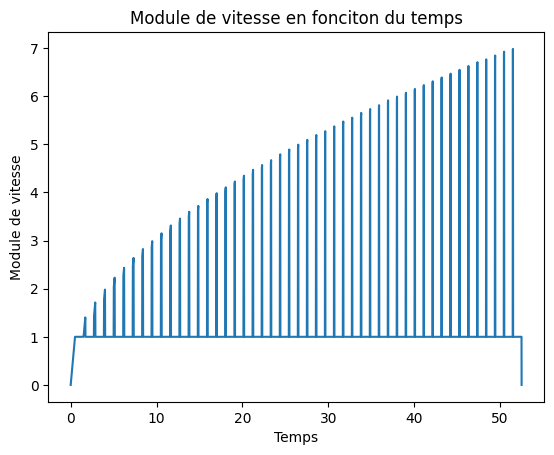

In [24]:
def vitesse_cyclotron(temps_ech):
    # Initialisation et définition des constantes
    N = 51
    tau = 0.5
    temps = np.zeros(N)
    vx = 0
    vy = 0
    
    # Echantillonnage du temps
    for i in range(N):
        temps[i] = i + 0.5*np.sqrt(i)
    
    # Calcul de la vitesse selon le régime
    for i in range(temps.size-1):
        if temps[i] < temps_ech < (temps[i+1]-1):
            vx = 0
            vy = ((-1)**i)*(np.sqrt(i)+(temps_ech - temps[i])/tau)
        if (temps[i+1]-1) < temps_ech < (temps[i+1]):
            vx = ((-1)**i)*np.sin(np.pi*(temps_ech - temps[i+1]))
            vy = -((-1)**i)*np.cos(np.pi*(temps_ech - temps[i+1]))
    
    # Retourne le module de la vitesse
    return(np.sqrt(vx**2 + vy**2))
            
# Echantillonnage mince du temps et initialisation du tableau de modules de vitesse
echantillon_final = np.linspace(0, temps[49], 5000)
vitesse_final = np.zeros(echantillon_final.size)

# Calcul du module de vitesses pour tout temps
for i in range(echantillon_final.size):
    vitesse_final[i] = vitesse_cyclotron(echantillon_final[i])

# Représentation graphique
plt.plot(echantillon_final, vitesse_final)
plt.xlabel('Temps')
plt.ylabel('Module de vitesse')
plt.title('Module de vitesse en fonciton du temps')
plt.show()

Pour conclure, nous constatons bel et bien que le proton accélère de façon quasi-linéaire entre les dees du cyclotron, prouvant que le temps passé par le proton entre les dees est de plus en plus faible au cours du temps.